# import libraries


In [1]:

import tensorflow as tf
import os
import cv2
import imghdr

import numpy as np
from matplotlib import pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# data_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake"
# image_exts = ['jpeg','jpg', 'bmp', 'png']
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
# #         image_path = os.path.join(data_dir, image_class, image)
#           print(image)

In [3]:
#choose random photo to know shape of image
img = cv2.imread('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/003IRD4LS5.jpg')
img.shape 

(256, 256, 3)

In [4]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             # os.remove(image_path)

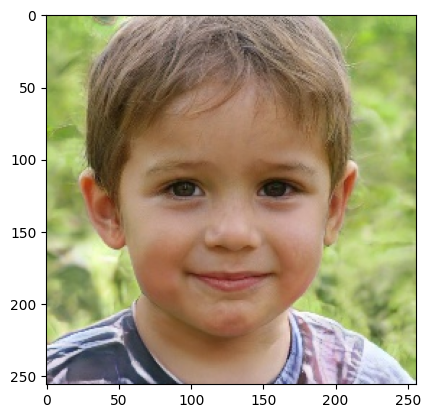

In [5]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB) )


## Load data

In [6]:
# tf.data.Dataset??

In [7]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [8]:
data_dir = "/kaggle/input/deepfake-dataset-merged"

train_data = os.path.join(data_dir,'train')

class_names = ['Fake', 'Real']

train = tf.keras.utils.image_dataset_from_directory(train_data,class_names=class_names)


Found 248002 files belonging to 2 classes.


In [9]:
valid_data = os.path.join(data_dir,'valid')
test_data = os.path.join(data_dir,'test')

valid = tf.keras.utils.image_dataset_from_directory(valid_data,class_names=class_names)
test = tf.keras.utils.image_dataset_from_directory(test_data,class_names=class_names)

Found 60428 files belonging to 2 classes.
Found 31905 files belonging to 2 classes.


In [10]:
# data_iterator = train.as_numpy_iterator()
# batch = data_iterator.next()

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

# 2.Preprocessing Images

## 2.1 Scale Images

In [11]:
#train dataset x -> photo , y -> label 0,1
train = train.map(lambda x,y: (x/255, y))
scaled_iterator = train.as_numpy_iterator()


In [12]:
batch1 = scaled_iterator.next()
batch1[0].max()

1.0

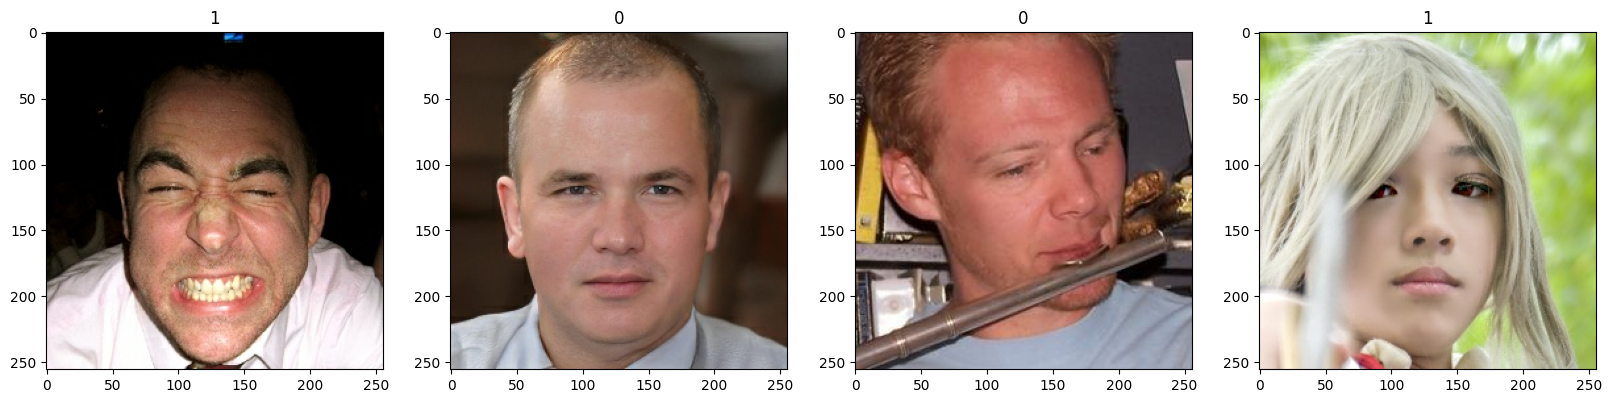

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch1[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch1[1][idx])
#     print(img)

    

In [14]:
# import matplotlib.pyplot as plt

# # Assuming 'file_paths' is a list containing file paths corresponding to the images in your dataset

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, (img, path) in enumerate(zip(batch1[0][:4], train[:4])):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(f"Label: {batch1[1][idx]}\nPath: {path}")
#     print(path)

# plt.show()


In [15]:
valid = valid.map(lambda x,y: (x/255, y))
scaled_iterator = valid.as_numpy_iterator()
batch2 = scaled_iterator.next()
batch2[0].max()



1.0

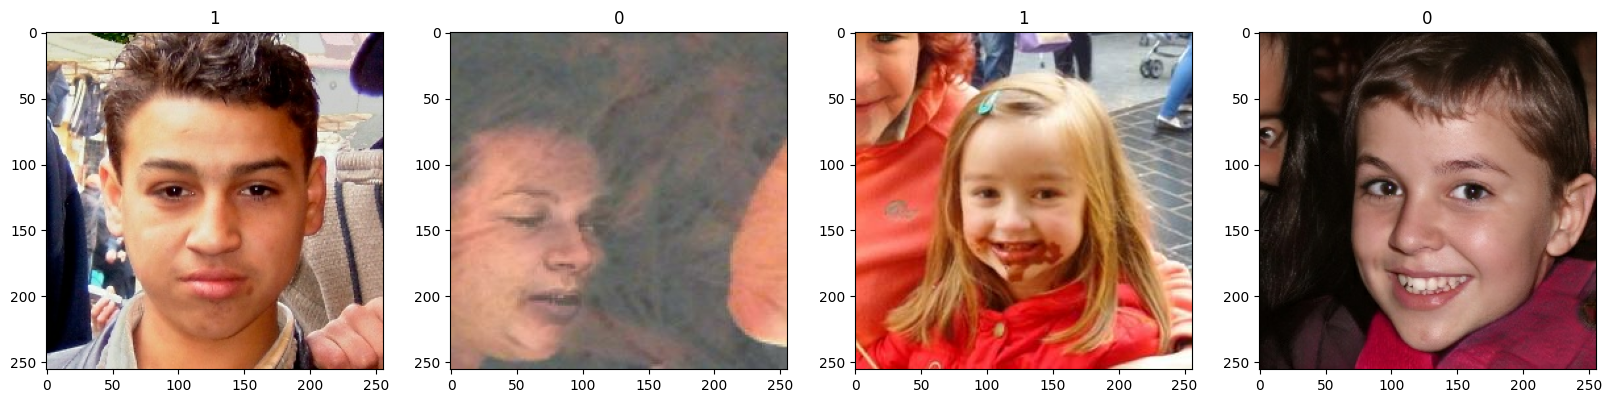

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch2[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch2[1][idx])
    

# 3. Build Deep Learning Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import layers, models



In [18]:
model = Sequential()

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
# model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

## 4. Train

In [23]:
# logdir='logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
           
# # Directory to save the model
# checkpoint_filepath = 'model_checkpoints/model_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.2f}.h5'
                               
# # ModelCheckpoint callback
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=False,  # Save the entire model
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,  # Only save the best model (based on the monitored metric)
#     verbose=1
# )                               

In [24]:
# hist = model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback,early_stopping])
# hist = model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback])
# hist = model.fit(train, epochs=50, validation_data=valid, callbacks=[tensorboard_callback,checkpoint_callback])

In [25]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=5,
                                                     restore_best_weights=True,
                                                    )
# checkpoint_filepath = "model_cp.h5"
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
checkpoint_filepath = 'model_checkpoints/model_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.2f}.h5'

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [28]:
hist = model.fit(train, epochs=10, validation_data=valid, callbacks=[tensorboard_callback,reduce_lr,checkpoint_cb])

Epoch 1/10
7751/7751 [==============================] - 547s 70ms/step - loss: 0.5361 - accuracy: 0.7663 - val_loss: 0.5088 - val_accuracy: 0.7795 - lr: 0.0010
Epoch 2/10
7751/7751 [==============================] - 545s 70ms/step - loss: 0.5152 - accuracy: 0.7810 - val_loss: 0.5288 - val_accuracy: 0.7780 - lr: 0.0010
Epoch 3/10
7751/7751 [==============================] - 545s 70ms/step - loss: 0.4996 - accuracy: 0.7910 - val_loss: 0.4825 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 4/10
7751/7751 [==============================] - 541s 70ms/step - loss: 0.4890 - accuracy: 0.7984 - val_loss: 0.4720 - val_accuracy: 0.8041 - lr: 0.0010
Epoch 5/10
7751/7751 [==============================] - 541s 70ms/step - loss: 0.4784 - accuracy: 0.8055 - val_loss: 0.4729 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 6/10
7751/7751 [==============================] - 541s 70ms/step - loss: 0.4689 - accuracy: 0.8131 - val_loss: 0.4943 - val_accuracy: 0.7936 - lr: 0.0010
Epoch 7/10
7751/7751 [==================

## 5. Plot Performance


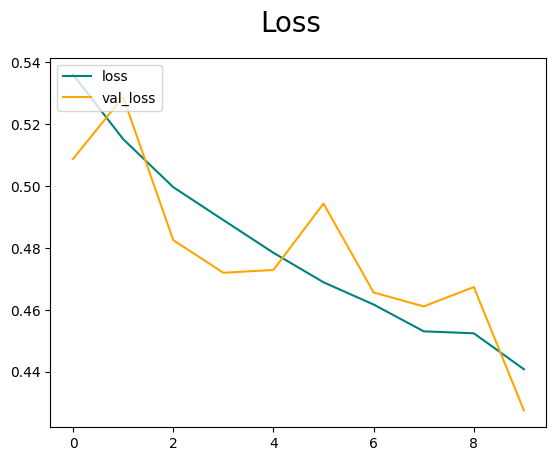

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

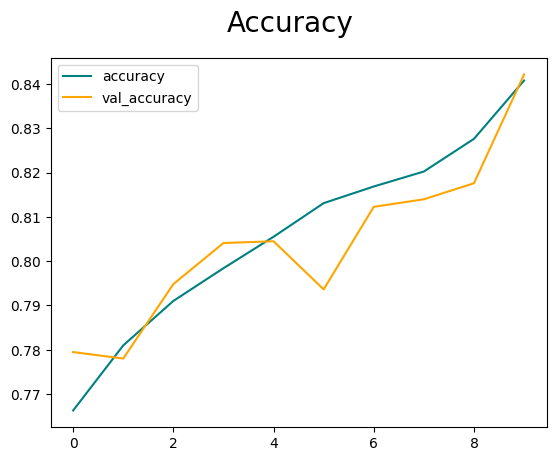

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 6. Evalute

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()



In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 229ms/step


In [33]:
print('Precision',pre.result().numpy(), "\nRecal",re.result().numpy(),"\nAccuracy", acc.result().numpy())

Precision 0.6098502 
Recal 0.6049439 
Accuracy 0.6221909


# 7. Test

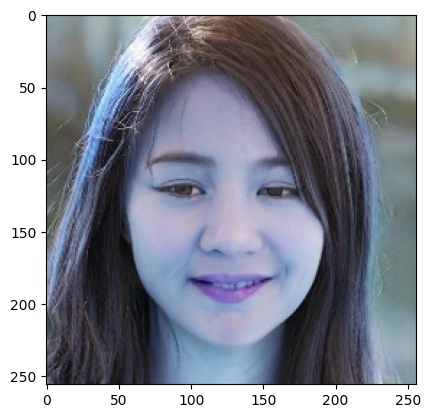

In [34]:
img = cv2.imread('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/00276TOPP4.jpg')
plt.imshow(img)
plt.show()

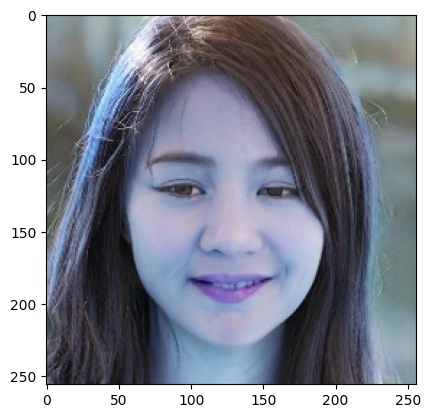

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [37]:
yhat

array([[0.25173092]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

Predicted class is fake


# 8. Save the Model

In [39]:
from tensorflow.keras.models import load_model

model.save('FaceClassifier.h5') #faceClassigfication.keras

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
new_model = load_model('FaceClassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


array([[0.25173092]], dtype=float32)

## END